# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

## **Importing the necessary libraries**

In [5]:
import numpy as np
import pandas as pd

**Let us check the version of tensorflow.**

In [7]:
# uncomment only if the tensorflow is unknown module.
#!pip install tensorflow

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [9]:
import h5py

h5Data = h5py.File('./SVHN_single_grey1.h5', 'r' )
h5Data.keys()


x_train = h5Data['X_train']
y_train = h5Data['y_train']


In [10]:
print(x_train[:])

[[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
  [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
  [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
  ...
  [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
  [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
  [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

 [[ 86.9591  87.0685  88.3735 ...  91.8014  89.7477  92.5302]
  [ 86.688   86.9114  87.4337 ...  90.7306  87.204   88.5629]
  [ 85.9654  85.8145  85.9239 ...  63.8626  59.8199  54.8805]
  ...
  [ 90.2236  91.0448  93.4637 ...  55.3535  48.5822  44.0557]
  [ 90.6427  90.4039  90.937  ...  78.2696  77.4977  74.27  ]
  [ 88.0236  88.1977  86.6709 ...  75.2206  76.6396  79.2865]]

 [[123.125  125.8581 122.0757 ... 123.5747 124.1186 123.3144]
  [121.1683 124.1294 117.4613 ... 115.6078 119.5751 122.8306]
  [124.6132 121.1019 109.6623 ... 111.1783 119.7923 124.7595]
  ...
  [135.1391 127.3679 117.754  ...  95.0919 105.5

Check the number of images in the training and the testing dataset.

In [12]:
x_training_cell = x_train[:]
y_training_cell = y_train[:]
x_test_cell = h5Data['X_test'][:]
y_test_cell = h5Data['y_test'][:]

In [13]:
print( "X_train cells:", len(x_training_cell) )
print( "X_test cells:", len(x_test_cell) )
print( "Y_train cells:", len(y_training_cell) )
print( "Y_test cells:", len(y_test_cell) )

#close the file.
h5Data.close()

X_train cells: 42000
X_test cells: 18000
Y_train cells: 42000
Y_test cells: 18000


**Observation:**

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

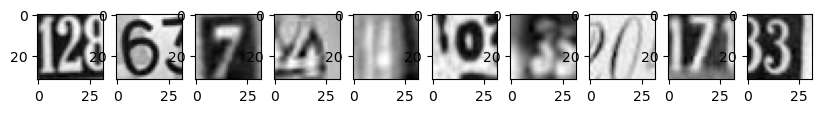

labels for the images: [2 6 7 4 4 0 3 0 7 3]


In [16]:
# to visualize the image lets import pyplot of matlibplot library
import matplotlib.pyplot as plt
plt.figure( figsize = (10, 1))

for img in range(10):
  plt.subplot( 1, 10, img+1 )
  plt.imshow( x_training_cell[img], cmap ='grey' )
plt.show()
print("labels for the images:", y_training_cell [0:10])

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [18]:
print( 'shape of first image:', x_training_cell[0].shape )
print( 'first image:', x_training_cell[0] )

shape of first image: (32, 32)
first image: [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [19]:
flat_dim = 1024
print( 'setting at flat dimentions of:', flat_dim )
x_training_cell = x_training_cell.reshape( x_training_cell.shape[0], flat_dim )
x_test_cell = x_test_cell.reshape( x_test_cell.shape[0], flat_dim )
x_test_cell.shape

setting at flat dimentions of: 1024


(18000, 1024)

### **Normalize the train and the test data**

In [21]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()

norm_x_train = normalizer.fit_transform(x_training_cell)
norm_x_train

array([[0.01354474, 0.01239371, 0.01099785, ..., 0.02034274, 0.02082801,
        0.0217228 ],
       [0.034725  , 0.03476869, 0.03528981, ..., 0.03003752, 0.03060416,
        0.03166114],
       [0.03943696, 0.04031236, 0.03910086, ..., 0.03008736, 0.03356345,
        0.03645823],
       ...,
       [0.03513627, 0.03552657, 0.03575703, ..., 0.03081276, 0.03116091,
        0.0313889 ],
       [0.03639875, 0.03657416, 0.03736819, ..., 0.03756359, 0.03721279,
        0.03668658],
       [0.02612426, 0.026399  , 0.02749795, ..., 0.0379397 , 0.03860263,
        0.03860263]], dtype=float32)

In [22]:
norm_x_test = normalizer.fit_transform( x_test_cell )
norm_x_test

array([[0.01746381, 0.02014797, 0.02108867, ..., 0.04737201, 0.04788217,
        0.04916916],
       [0.03428868, 0.03399097, 0.03369325, ..., 0.01254665, 0.01436689,
        0.01585547],
       [0.03444921, 0.03482999, 0.03524023, ..., 0.03313724, 0.03304164,
        0.03314559],
       ...,
       [0.03893512, 0.03859005, 0.03814824, ..., 0.03816485, 0.03813814,
        0.03811143],
       [0.03775596, 0.03751284, 0.03699531, ..., 0.0397347 , 0.03918589,
        0.03891149],
       [0.01785559, 0.01785559, 0.01785559, ..., 0.02075862, 0.02051434,
        0.02016708]], dtype=float32)

Print the shapes of Training and Test data

In [24]:
print( "shape of normalized training data:", norm_x_train.shape )
print( "shape of normalized test data:", norm_x_test.shape )

shape of normalized training data: (42000, 1024)
shape of normalized test data: (18000, 1024)


### **One-hot encode output**

In [26]:
from tensorflow.keras.utils import to_categorical


# Assuming y_train and y_test contain integer class labels
num_classes = len(set(y_training_cell))  # Get the number of unique classes

y_train_encode = to_categorical( y_training_cell, num_classes=num_classes )
print("training lablel:", y_train_encode )

y_test_encode = to_categorical( y_test_cell, num_classes=num_classes )


# Print an example
print("Original label:", y_training_cell[0])
print("One-hot encoded:", y_train_encode[0])


training lablel: [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Original label: 2
One-hot encoded: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


**Observation:**
For the one-hot coding - the to_categorical function converts matrix into binary represenation of 0 and 1. It is more useful for the machine learning model to use - in for further processing.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [29]:
import random
random_seed = 63

#set the random seed for np and tf as well.
random.seed( random_seed )
np.random.seed( random_seed )
tf.random.set_seed( random_seed )


### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [32]:
# add the layers as mentioned above %% [markdown] ### **Plot the Training and
# Validation Accuracies and write down your Observations.** %%

def ANNModelOne():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(1024,)),  # Input layer (only defines the input shape)
      tf.keras.layers.Dense( 64, activation= 'relu' ), # First hidden layer
      tf.keras.layers.Dense( 32, activation= 'relu'), #second hidden layer
      tf.keras.layers.Dense( 10, activation= 'softmax' ) #output layer
  ])
  # Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [34]:
model1 = ANNModelOne()
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Train the model
no_epochs = 20
model1_history = model1.fit(norm_x_train, y_train_encode, epochs=no_epochs, batch_size=128, validation_split=0.2, verbose=1 )
model1_history.history.keys()

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.1481 - val_loss: 2.2876
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1722 - loss: 2.2573 - val_accuracy: 0.2255 - val_loss: 2.1149
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2340 - loss: 2.0700 - val_accuracy: 0.2677 - val_loss: 1.9776
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2736 - loss: 1.9580 - val_accuracy: 0.3037 - val_loss: 1.8994
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3196 - loss: 1.8785 - val_accuracy: 0.3435 - val_loss: 1.8185
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3568 - loss: 1.7987 - val_accuracy: 0.3818 - val_loss: 1.7463
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3903 - loss: 1.7239 - val_accuracy: 0.4021 - val_loss: 1.6849
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4120 - loss: 1.6679 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

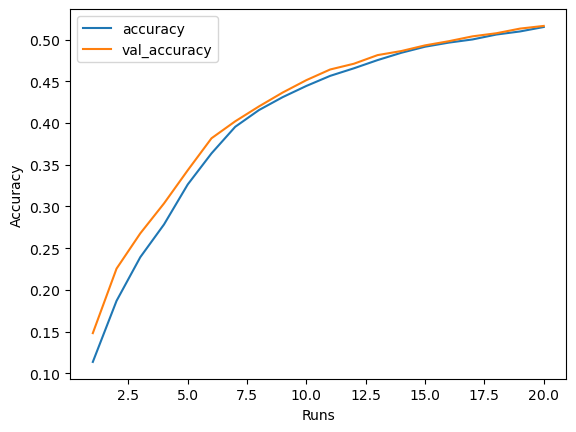

In [36]:

# Plotting the accuracies

dataHist = model1_history.history
point_list = [i for i in range(1, no_epochs+1)]
plt.plot(point_list, dataHist['accuracy'], label = 'accuracy')
plt.plot(point_list, dataHist['val_accuracy'], label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Runs')
plt.legend()

plt.show()

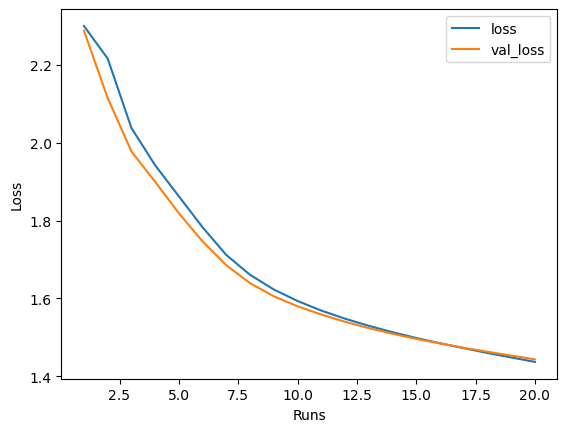

In [37]:
plt.plot(point_list, dataHist['loss'], label = 'loss')
plt.plot(point_list, dataHist['val_loss'], label = 'val_loss')
plt.ylabel('Loss')
plt.xlabel('Runs')
plt.legend()
plt.show()



**Observations:_______**

```
# This is formatted as code
```
The accuracy and val_accuracy increases with more runs on the model - it seems like the model is improving with training data in the subsequent runs. It is achieving its optimal value around the 15 runs and then improves slowly but surely.


the loss trends higher but overall with more runs it comes down and then it converges to very few points like less than 1.4.


Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [43]:
# different model with more - hidden layers - to smoothen the prediction may be.

def ANNModelTwo():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(1024,)),  # Input layer (only defines the input shape)
      tf.keras.layers.Dense( 256, activation= 'relu' ), # First hidden layer
      tf.keras.layers.Dense( 128, activation= 'relu'),  # second hidden layer
      tf.keras.layers.Dropout(0.2),                     # drop 20% of neuron
      tf.keras.layers.Dense( 64, activation= 'relu'),   # Third hidden layer
      tf.keras.layers.Dense( 64, activation= 'relu'),   # Four hidden layer
      tf.keras.layers.Dense( 32, activation= 'relu'),   # Fifth hidden layer
      tf.keras.layers.BatchNormalization(),             # Batch normalization layer
      tf.keras.layers.Dense( 10, activation= 'softmax' ) #output layer
  ])

  # Compile the model
  optAdam = tf.keras.optimizers.Adam( learning_rate= 0.00005 )
  model.compile(optimizer=optAdam, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model2 = ANNModelTwo()
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

Train the model

In [45]:
no_epochs=30
model2_history = model2.fit(norm_x_train, y_train_encode, epochs=no_epochs, batch_size=128, validation_split=0.2, verbose=1 )
model2_history.history.keys()

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1130 - loss: 2.3083 - val_accuracy: 0.1650 - val_loss: 2.2951
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1891 - loss: 2.2283 - val_accuracy: 0.2754 - val_loss: 2.1855
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2802 - loss: 2.0598 - val_accuracy: 0.3645 - val_loss: 1.9259
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3545 - loss: 1.8930 - val_accuracy: 0.4432 - val_loss: 1.7188
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4194 - loss: 1.7285 - val_accuracy: 0.5017 - val_loss: 1.5678
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4672 - loss: 1.6003 - val_accuracy: 0.5448 - val_loss: 1.4468
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5123 - loss: 1.4928 - val_accuracy: 0.5844 - val_loss: 1.3574
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5435 - loss: 1.4103 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### **Plot the Training and Validation Accuracies and write down your Observations.**

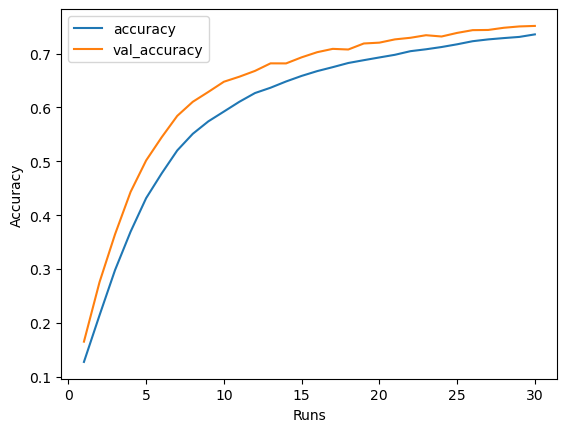

In [47]:

# Plotting the accuracies

dataHist = model2_history.history
point_list = [i for i in range(1, no_epochs+1)]
plt.plot(point_list, dataHist['accuracy'], label = 'accuracy')
plt.plot(point_list, dataHist['val_accuracy'], label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Runs')
plt.legend()

plt.show()

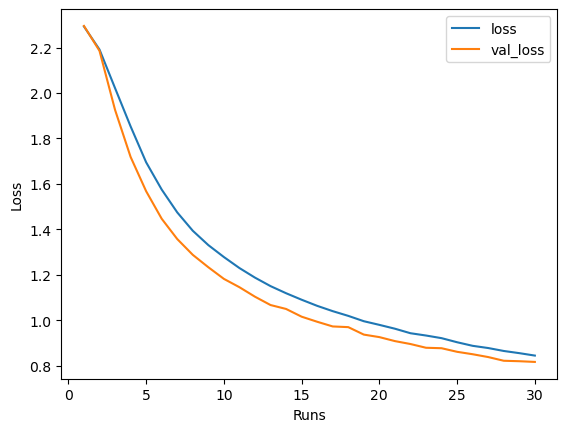

In [48]:
plt.plot(point_list, dataHist['loss'], label = 'loss')
plt.plot(point_list, dataHist['val_loss'], label = 'val_loss')
plt.ylabel('Loss')
plt.xlabel('Runs')
plt.legend()
plt.show()



**Observations:_______**

Again it is very similar observation to previous model - as far as the plot goes i dont seem much difference the trend seems very simiilar and both accuracy seems to converge and the loss also seems to converge with the runs/epochs.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# we have X_test and y_test
# make a prediction on test data
predictions = model2.predict(norm_x_test)
print( "predictions:", predictions )

# generate a classificaiton metrics
predicted_digits = np.argmax(predictions, axis=1 )
print( "classifications:", predicted_digits )
print( "y-test", y_test_encode )

# generate a confusion metrics make sure - y-test is one-hot encoded
cm = confusion_matrix( np.argmax(y_test_encode, axis=1 ), predicted_digits )


# Print confusion matrix
print("Confusion Matrix:\n", cm)


563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
predictions: [[3.6935645e-01 2.7667429e-02 6.8437710e-02 ... 1.6379027e-02
  1.7939611e-01 1.9298343e-01]
 [1.6949915e-04 1.3967194e-03 7.8447664e-01 ... 1.8155658e-01
  1.8717840e-02 2.6479862e-03]
 [5.7441139e-05 3.6074768e-04 9.7651058e-01 ... 5.6353770e-03
  6.9037951e-03 1.9098782e-03]
 ...
 [4.4051619e-04 1.3053750e-02 6.6711595e-03 ... 9.7781038e-01
  2.2224762e-05 8.8062708e-04]
 [3.1478889e-02 2.0159730e-03 1.9256254e-03 ... 3.8630308e-03
  2.0507302e-02 8.2584530e-01]
 [2.5374541e-04 9.8780484e-04 9.6565109e-01 ... 1.2219296e-02
  8.5063800e-03 4.4388883e-04]]
classifications: [0 2 2 ... 7 9 2]
y-test [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]
Confusion Matrix:
 [[1368   55   28   30   23   26   96   35   50  103]
 [  19 1448   52   58   50   25   15   97   34   30]
 [  11   38 1459   54   19   22   12   90   39   59]
 [  

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

Show the confustion metrics on heatmap


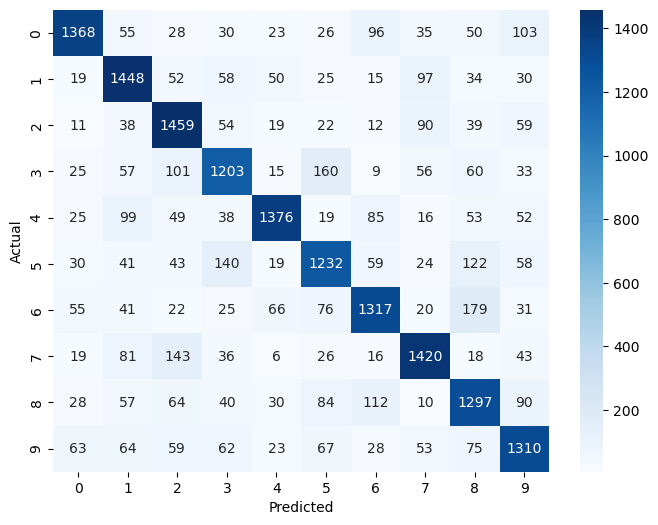

Show the classification results
classifications: [0 2 2 ... 7 9 2]
show the actula digits
labels for the images: [1 7 2 9 0 9 1 8 4 4]
labels for the predicated image:  [0 2 2 9 0 9 1 5 1 4]


<Figure size 1000x100 with 0 Axes>

In [54]:
# Visualize the confusion matrix
plt.figure( figsize=(8, 6) )
sns.heatmap( cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(cm.shape[0]), yticklabels=range(cm.shape[0]) )
plt.xlabel( 'Predicted' )
plt.ylabel( 'Actual' )
print("Show the confustion metrics on heatmap")
plt.show()


print("Show the classification results")
# generate a classificaiton metrics
predicted_digits = np.argmax(predictions, axis=1 )
print( "classifications:", predicted_digits )


print("show the actula digits")
plt.figure( figsize = (10, 1))

# show test images and digits so that we can compare with the predicated one.
#for img in range(10):
#  plt.subplot( 1, 10, img+1 )
#  plt.imshow( x_test_cell[img], cmap ='grey' )
#plt.show()

print("labels for the images:", y_test_cell [0:10])

print("labels for the predicated image: ", predicted_digits[0:10] )

**Final Observations:__________**
The confusion metricx on diagonal has score above 1000, which means the digits actual and predicated as a score higher and the rest has lower score that tells the model's strenght to predict the digits have greater chance of predicting the digits right.

Certain values have higher confusion map - it is visible from the dump of actual labels against the predicted digits on the first 10 numbers - few numbers are mixed up. these an be corrected with further images and training of the model.


## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [58]:
h5Data = h5py.File('./SVHN_single_grey1.h5', 'r' )
h5Data.keys()


<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

Check the number of images in the training and the testing dataset.

In [60]:
X_test = h5Data[ 'X_test' ][:]
X_train = h5Data[ 'X_train' ][:]
X_val = h5Data[ 'X_val' ][:]
y_test = h5Data[ 'y_test' ][:]
y_train = h5Data[ 'y_train' ][:]
y_val = h5Data[ 'y_val' ][:]

print("No of images in training set:", len(X_train) )
print("No of images in testing set:", len(X_test) )
h5Data.close()


No of images in training set: 42000
No of images in testing set: 18000


**Observation:**
There are 42000 images in the training data set and 18000 in testing data set.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [63]:
#print the shape and the array of pixels for the first image in the training dataset
print( "The first image of training dataset:", X_train[0].shape )
print( "First image:", X_train[0] )

The first image of training dataset: (32, 32)
First image: [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [65]:
#Reshape the train and the test dataset because we always have to give a 4D array as input into CNNs.
X_train = X_train.reshape( X_train.shape[0], 32, 32, 1 )
X_test = X_test.reshape( X_test.shape[0], 32, 32, 1 )


Normalize inputs from 0-255 to 0-1

In [67]:

# normalize the train and test dataset by dividing by 255
X_train = X_train / 255
X_test = X_test / 255


Print New shape of Training and Test

In [69]:

# print the new shape of the dataset
print( "New training set: ", X_train.shape, y_train.shape )
print( "New test set: ", X_test.shape, y_test.shape )


New training set:  (42000, 32, 32, 1) (42000,)
New test set:  (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [71]:

# Assuming y_train and y_test contain integer class labels
num_classes = len(set(y_train))  # Get the number of unique classes

# One-hot encode the labels
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Print an example
print("Original label:", y_train[0])
print("One-hot encoded:", y_train_onehot[0])


Original label: 2
One-hot encoded: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


**Observation:**
As expected these entries are one-hot encoded array now.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [74]:
# set the random seed - for the CNNs and numbers
np.random.seed( random_seed )
random.seed( random_seed )
tf.random.set_seed( random_seed )

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
# Define the CNN model
def CNNModelOne():
  model = tf.keras.models.Sequential([
        # First Convolutional Layer
        tf.keras.layers.Input(shape=(32,32,1,)),  # Input layer (only defines the input shape)
        tf.keras.layers.Conv2D(16, (3, 3), padding='same'),
        tf.keras.layers.LeakyReLU(negative_slope=0.1),

        # Second Convolutional Layer
        tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
        tf.keras.layers.LeakyReLU(negative_slope=0.1),

        # Max Pooling Layer
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten Layer
        tf.keras.layers.Flatten(),

        # Fully Connected Dense Layer
        tf.keras.layers.Dense(32),
        tf.keras.layers.LeakyReLU(negative_slope=0.1),

        # Output Layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',  # Use sparse_categorical_crossentropy if labels are not one-hot encoded
                metrics=['accuracy'])
  return model

In [ ]:
# create the model
cnnModelOne = CNNModelOne()

cnnModelOne.summary()

In [79]:
# Train the model
no_epochs = 20
history = cnnModelOne.fit(
    X_train, y_train_onehot,
    epochs=no_epochs,         # Change epochs as needed
    batch_size=32,            # Change batch size if needed
    validation_split = 0.2,
    validation_data=(X_test, y_test_onehot)
)

# Print training history
print("Training Complete!")

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.4926 - loss: 1.4984 - val_accuracy: 0.8424 - val_loss: 0.5723
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8465 - loss: 0.5452 - val_accuracy: 0.8632 - val_loss: 0.4947
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8730 - loss: 0.4502 - val_accuracy: 0.8681 - val_loss: 0.4734
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8868 - loss: 0.3944 - val_accuracy: 0.8715 - val_loss: 0.4632
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8992 - loss: 0.3494 - val_accuracy: 0.8724 - val_loss: 0.4675
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9105 - loss: 0.3116 - val_accuracy: 0.8700 - val_loss: 0.4884
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9210 - loss: 0.2769 - val_accuracy: 0.8719 - val_loss: 0.4930
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9275 -

### **Plot the Training and Validation Accuracies and Write your observations.**

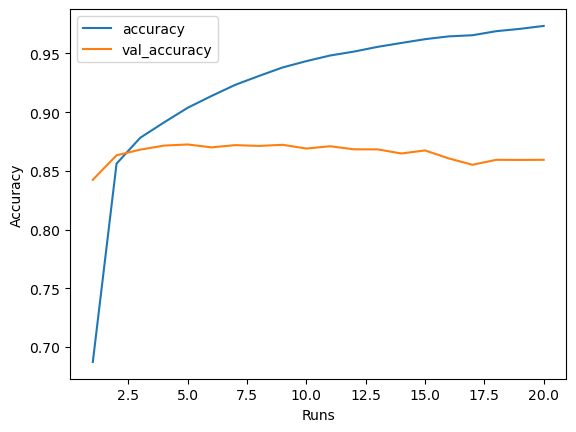

In [81]:
# Plotting the accuracies
cnn1Hist = history.history
point_list = [i for i in range(1, no_epochs+1)]
plt.plot(point_list, cnn1Hist['accuracy'], label = 'accuracy')
plt.plot(point_list, cnn1Hist['val_accuracy'], label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Runs')
plt.legend()

plt.show()

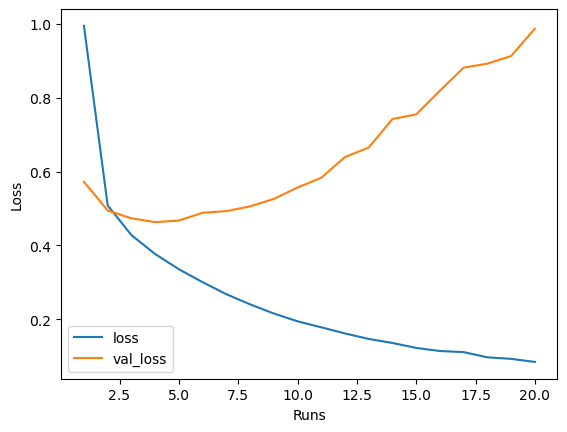

In [82]:
plt.plot(point_list, cnn1Hist['loss'], label = 'loss')
plt.plot(point_list, cnn1Hist['val_loss'], label = 'val_loss')
plt.ylabel('Loss')
plt.xlabel('Runs')
plt.legend()
plt.show()


**Observations:__________**
The val_acuracy and Acuracy diverge significantly with the epochs runs. Which was not the case with ANNs. Similar is the observation with loss as well.


Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [85]:
#clear the keras backend
tf.keras.backend.clear_session()

#fix the seeding again - not sure why but it is mentioned in the rubric
np.random.seed( random_seed )
random.seed( random_seed )
tf.random.set_seed( random_seed )

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [88]:
# Define the CNN model
def CreateCNNModelTwo():
  model = tf.keras.models.Sequential([
        # First Convolutional Layer
        tf.keras.layers.Input(shape=(32,32,1,)),  # Input layer (only defines the input shape)
        tf.keras.layers.Conv2D(16, (3, 3), padding='same'),
        tf.keras.layers.LeakyReLU( negative_slope=0.1 ),

        # Second Convolutional Layer
        tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
        tf.keras.layers.LeakyReLU(negative_slope=0.1),

        # Max Pooling Layer
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # add a batchnormalization layer
        tf.keras.layers.BatchNormalization(),

        # add third convolutional layer:
        tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
        tf.keras.layers.LeakyReLU(negative_slope=0.1),

        # add fourth convolutional layer
        tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
        tf.keras.layers.LeakyReLU(negative_slope=0.1),

        # Max Pooling Layer
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # add a batchnormalization layer
        tf.keras.layers.BatchNormalization(),

        # Flatten Layer
        tf.keras.layers.Flatten(),

        # Fully Connected Dense Layer
        tf.keras.layers.Dense(32),
        tf.keras.layers.LeakyReLU(negative_slope=0.1),

        # Output Layer
        tf.keras.layers.Dense(10, activation='softmax')
  ])

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',  # Use sparse_categorical_crossentropy if labels are not one-hot encoded
                metrics=['accuracy'])
  return model

In [89]:
cnnModel2 = CreateCNNModelTwo()

print("CNN model 2 Summary", cnnModel2.summary() )


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

CNN model 2 Summary None


In [90]:
#Fit the model:
# Train the model
no_epochs = 30
cnn2Hist = cnnModel2.fit(
    X_train, y_train_onehot,
    epochs=no_epochs,           # Change epochs as needed
    batch_size=128,            # Change batch size if needed
    validation_split = 0.2,
    validation_data=(X_test, y_test_onehot)
)

# Print training history
print("Training Complete!" , cnn2Hist )

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.5390 - loss: 1.3617 - val_accuracy: 0.5846 - val_loss: 1.3012
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 26s 79ms/step - accuracy: 0.8805 - loss: 0.4026 - val_accuracy: 0.8561 - val_loss: 0.4670
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 25s 75ms/step - accuracy: 0.9123 - loss: 0.2932 - val_accuracy: 0.8799 - val_loss: 0.4065
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 25s 75ms/step - accuracy: 0.9339 - loss: 0.2264 - val_accuracy: 0.8796 - val_loss: 0.4288
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step - accuracy: 0.9448 - loss: 0.1835 - val_accuracy: 0.8751 - val_loss: 0.4682
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - accuracy: 0.9559 - loss: 0.1515 - val_accuracy: 0.8268 - val_loss: 0.6299
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 25s 77ms/step - accuracy: 0.9625 - loss: 0.1281 - val_accuracy: 0.8802 - val_loss: 0.4870
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 25s 75ms/step - accuracy: 0.9672 - loss: 0.1036 - 

### **Plot the Training and Validation accuracies and write your observations.**

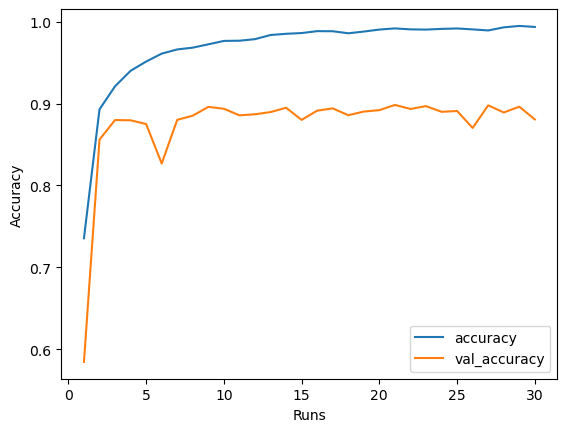

In [97]:
# Plotting the accuracies
point_list = [i for i in range(1, no_epochs+1)]
plt.plot(point_list, cnn2Hist.history['accuracy'], label = 'accuracy')
plt.plot(point_list, cnn2Hist.history['val_accuracy'], label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Runs')
plt.legend()

plt.show()

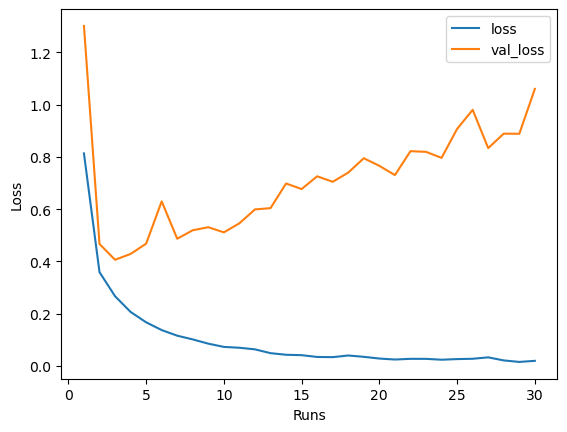

In [99]:
plt.plot(point_list, cnn2Hist.history['loss'], label = 'loss')
plt.plot(point_list, cnn2Hist.history['val_loss'], label = 'val_loss')
plt.ylabel('Loss')
plt.xlabel('Runs')
plt.legend()
plt.show()

**Observations:________**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [101]:

# we have X_test and y_test
# make a prediction on test data
cnn2Prediction = cnnModel2.predict(X_test)
print( "predictions:", cnn2Prediction )

# generate a classificaiton metrics
cnn2PredictedDigits = np.argmax(cnn2Prediction, axis=1 )
print( "classifications:", cnn2PredictedDigits )
print( "y-test", y_test_encode )

# generate a confusion metrics make sure - y-test is one-hot encoded
cmCnn2 = confusion_matrix( np.argmax(y_test_encode, axis=1 ), cnn2PredictedDigits )


# Print confusion matrix
print("Confusion Matrix:\n", cmCnn2)


563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
predictions: [[1.28818956e-05 7.90373713e-04 4.47267700e-12 ... 1.98071870e-08
  9.99181807e-01 1.08881366e-07]
 [3.75824929e-27 2.29090385e-20 9.40627090e-12 ... 1.00000000e+00
  5.43591017e-16 1.40245567e-18]
 [9.96002021e-17 6.99953130e-14 1.00000000e+00 ... 1.83001532e-15
  1.25954032e-12 2.25070365e-19]
 ...
 [5.90081041e-29 2.38991986e-11 1.48459781e-18 ... 1.00000000e+00
  6.34979967e-22 1.94901541e-22]
 [2.52222390e-14 9.02252318e-12 9.98933297e-11 ... 1.28885025e-14
  7.08549321e-01 6.46236745e-11]
 [1.31017480e-11 1.06446215e-14 6.78525686e-01 ... 3.21474075e-01
  1.52967569e-12 2.68488122e-07]]
classifications: [8 7 2 ... 7 8 2]
y-test [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]
Confusion Matrix:
 [[1686   16   11    3   11    1   28   12   29   17]
 [  31 1587   13   19   63    7   13   47   37   11]
 [  15   16 1581   21  

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Write your final observations on the performance of the model on the test data.**

Show the confustion metrics on heatmap


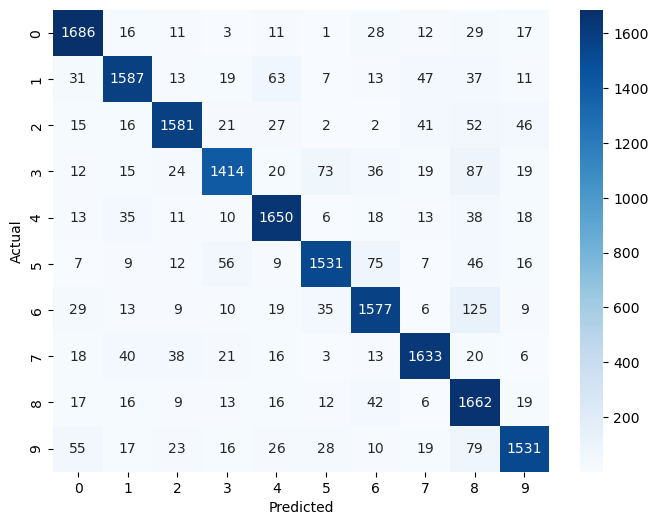

Show the classification results
classifications: [8 7 2 ... 7 8 2]
show the actula digits


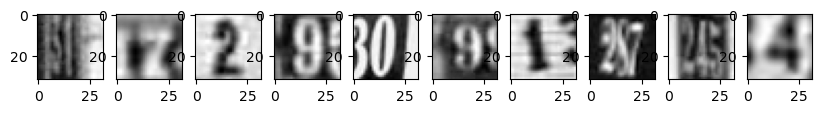

labels for the images: [1 7 2 9 0 9 1 8 4 4]
labels for the predicated image:  [8 7 2 9 0 9 1 9 8 4]


In [103]:
# Visualize the confusion matrix
plt.figure( figsize=(8, 6) )
sns.heatmap( cmCnn2, annot=True, fmt='d', cmap='Blues', xticklabels=range(cm.shape[0]), yticklabels=range(cm.shape[0]) )
plt.xlabel( 'Predicted' )
plt.ylabel( 'Actual' )
print("Show the confustion metrics on heatmap")
plt.show()


print("Show the classification results")
# generate a classificaiton metrics
cnn2PredictedDigits = np.argmax(cnn2Prediction, axis=1 )
print( "classifications:", cnn2PredictedDigits )


print("show the actula digits")
plt.figure( figsize = (10, 1))

# show test images and digits so that we can compare with the predicated one.
for img in range(10):
  plt.subplot( 1, 10, img+1 )
  plt.imshow( X_test[img], cmap ='grey' )
plt.show()

print("labels for the images:", y_test [0:10])

print("labels for the predicated image: ", cnn2PredictedDigits[0:10] )

Final Observations:

**Final Observations:_________**